1. Загрузите набор данных ex1data1.txt из текстового файла.

In [1]:
DATA_PATH = '/home/ataleckij/Projects/university/mo/Data/Lab 1/'

In [2]:
files_names = !ls '{DATA_PATH}'
files_names

['ex1data1.txt', 'ex1data2.txt']

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
files_paths = [os.path.join(DATA_PATH, name) for name in files_names]

df1 = pd.read_csv(files_paths[0], header=None, names=['население', 'прибыль'])
df1

,население,прибыль
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.


In [5]:
data1, labels1 = df1[[df1.columns[0]]],  df1[df1.columns[1]]

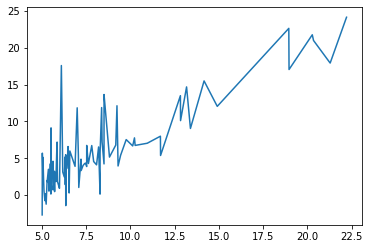

In [6]:
sorted_index = np.argsort(data1.values.T[0])

plt.plot(data1.iloc[sorted_index].values.T[0], labels1.iloc[sorted_index])
plt.show()

3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [7]:
def loss(y_pred, y_true):
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    m = y_pred.shape[0]
    return 1/(2*m) * ((y_pred - y_true) ** 2).sum()

4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.

In [56]:
class LinearRegression:
    def __init__(self, w=None, lr=0.01):
        self.w = w and np.array(w)
        self.lr = lr
        self.history = []
    
    def _calc_grad(self, data_with_offset, labels):
        return ((self.predict(data_with_offset) - labels) * data_with_offset.T).T.mean(axis=0)
    
    def fit(self, data, labels, max_iters=None):
        data, labels = np.array(data), np.array(labels)
        if self.w is None:
            self.w = np.zeros(data.shape[1] + 1)
        else:
            assert self.w.shape[0] == (data.shape[1] + 1)
        
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        
        grad = self._calc_grad(data_with_offset, labels)
        zero_grad = np.zeros(grad.shape)
        iterarion = 0
        self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
        while not np.allclose(grad, zero_grad):
            self.w -= self.lr * grad
            grad = self._calc_grad(data_with_offset, labels)
            iterarion += 1
            self.history.append((iterarion, loss(self.predict(data_with_offset), labels), grad))
            if max_iters and max_iters <= iterarion:
                break
        
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        return data_with_offset.dot(self.w)
    
#     def score(self, data, labels):


In [9]:
reg = LinearRegression(lr=0.005)
reg.fit(data1, labels1)

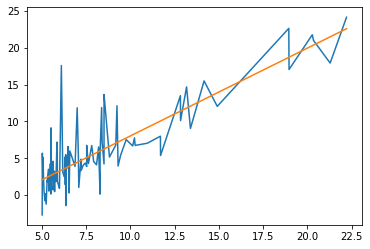

In [10]:
prediction = reg.predict(data1)

plt.plot(data1.iloc[sorted_index].values.T[0], labels1.iloc[sorted_index])
plt.plot(data1.iloc[sorted_index].values.T[0], prediction[sorted_index])
plt.show()

(20060, 4.476971375975179, array([ 9.99288195e-09, -1.00390624e-09]))


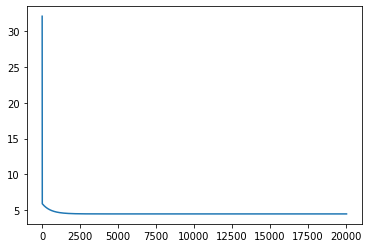

In [11]:
print(reg.history[-1])
iters, losses = list(zip(*reg.history))[:2]

plt.plot(iters, losses)
plt.show()

5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

In [12]:
print(reg.w)
w0, w1 = reg.w

[-3.89578082  1.19303364]


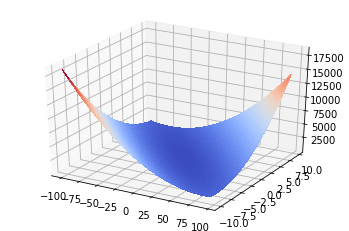

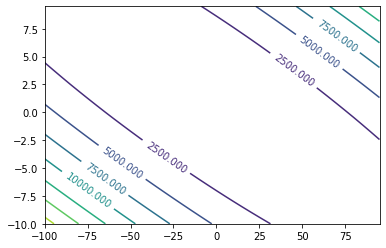

In [13]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# d1 = 2
# d0 = 2

# w1s = np.arange(-d1 + w1, d1 + w1, 0.01)
# w0s = np.arange(-d0 + w0, d0 + w0, 0.01)

w0s = np.arange(-100, 100, 5)
w1s = np.arange(-10, 10, 0.5)

w0s, w1s = np.meshgrid(w0s, w1s)

losses = np.array([loss(LinearRegression(w=(w0_, w1_)).predict(data1), labels1)
                   for w0_, w1_ in zip(w0s.flatten(), w1s.flatten())])
losses = losses.reshape(w1s.shape)

surf = ax.plot_surface(w0s, w1s, losses, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


fig, ax = plt.subplots()
CS = ax.contour(w0s, w1s, losses)
ax.clabel(CS, inline=1, fontsize=10)
plt.show()

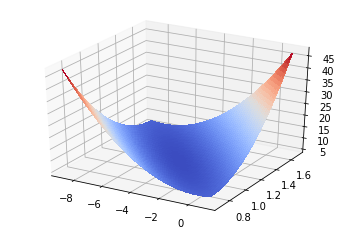

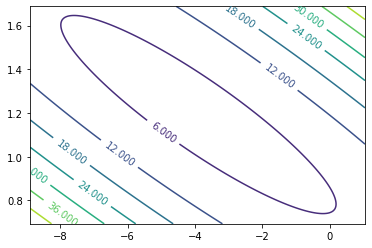

In [14]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

d0 = 5
d1 = 0.5

w0s = np.arange(-d0 + w0, d0 + w0, 0.05)
w1s = np.arange(-d1 + w1, d1 + w1, 0.005)

w0s, w1s = np.meshgrid(w0s, w1s)

losses = np.array([loss(LinearRegression(w=(w0_, w1_)).predict(data1), labels1)
                   for w0_, w1_ in zip(w0s.flatten(), w1s.flatten())])
losses = losses.reshape(w1s.shape)

surf = ax.plot_surface(w0s, w1s, losses, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()


fig, ax = plt.subplots()
CS = ax.contour(w0s, w1s, losses)
ax.clabel(CS, inline=1, fontsize=10)
plt.show()

In [15]:
reg.history[-1]

(20060, 4.476971375975179, array([ 9.99288195e-09, -1.00390624e-09]))

6. Загрузите набор данных ex1data2.txt из текстового файла.

In [16]:
columns =['площадь дома(фут^3)', 'количество комнат', 'стоимость дома']
df2 = pd.read_csv(files_paths[1], header=None, names=columns)
print(df2.head())

data2, labels2 = df2[columns[:-1]], df2[columns[-1]]

   площадь дома(фут^3)  количество комнат  стоимость дома
0                 2104                  3          399900
1                 1600                  3          329900
2                 2400                  3          369000
3                 1416                  2          232000
4                 3000                  4          539900


In [17]:
print(data2.head())
print(labels2.head())

   площадь дома(фут^3)  количество комнат
0                 2104                  3
1                 1600                  3
2                 2400                  3
3                 1416                  2
4                 3000                  4
0    399900
1    329900
2    369000
3    232000
4    539900
Name: стоимость дома, dtype: int64


In [ ]:
# reg2 = LinearRegression(lr=0.000000001)
# %time reg2.fit(data2, labels2)

In [27]:
reg2.history[-1]

(7991563,
 2394957068.4448576,
 array([ -9486.32480311,     27.86064413, -16445.90940367]))

7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [28]:
data2_normed = (data2 - data2.min()) / (data2.max() - data2.min())

In [29]:
reg2_normed = LinearRegression(lr=0.1)
%time reg2_normed.fit(data2_normed, labels2)

CPU times: user 1.39 s, sys: 8.01 ms, total: 1.4 s
Wall time: 1.4 s


In [30]:
reg2_normed.history[-1]

(16180,
 2043280050.6028283,
 array([-3.33084051e-09, -6.98589169e-09,  9.99236673e-09]))

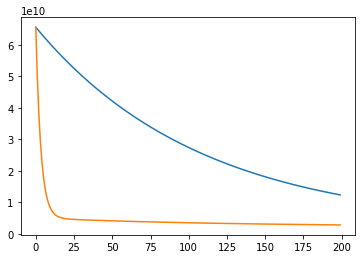

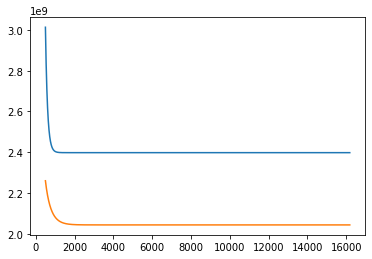

In [31]:
iters, losses = list(zip(*reg2.history))[:2]

iters_normed, losses_normed = list(zip(*reg2_normed.history))[:2]
iters_count = len(iters_normed)

def plot_(start, end):
    plt.plot(iters[start:end], losses[start:end])
    plt.plot(iters_normed[start:end], losses_normed[start:end])
    plt.show()

plot_(0, 200)
plot_(500, iters_count)

8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

9. Покажите, что векторизация дает прирост производительности.

In [87]:
# сразу реализовывал с векторизацей и для многомерной линейной регрессии

10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

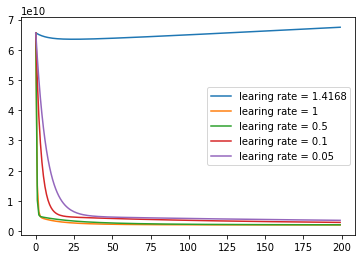

In [83]:
def plot_lrs(learing_rates, start, end):
    plots = []
    for lr in learing_rates:
        reg2_normed = LinearRegression(lr=lr)
        max_iters = end or 50_000
        reg2_normed.fit(data2_normed, labels2, max_iters=max_iters)
        history = reg2_normed.history
        iters, losses = list(zip(*history))[:2]
        line_, = plt.plot(iters[start:end], losses[start:end], label=f'learing rate = {lr}')
        plots.append(line_)
    
    plt.legend(handles=plots)
    plt.show()

plot_lrs(learing_rates=[1.4168, 1, 0.5, 0.1, 0.05], start=0, end=200)

11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

In [37]:
class AnaliticRegression:
    def __init__(self, w=None):
        self.w = w and np.array(w)
    
    def fit(self, data, labels):
        data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        X, y = np.array(data_with_offset), np.array(labels)
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
        return self
    
    def predict(self, data):
        data = np.array(data)
        if self.w.shape[0] == data.shape[1]:
            data_with_offset = data
        else:
            data_with_offset = np.hstack((np.ones((data.shape[0], 1)), data))
        X = data_with_offset
        return X.dot(self.w)

In [38]:
areg1 = AnaliticRegression()
areg1.fit(data1, labels1)

print(reg.w, areg1.w)
print(loss(reg.predict(data1), labels1), loss(areg1.predict(data1), labels1))

[-3.89578082  1.19303364] [-3.89578088  1.19303364]
4.476971375975179 4.476971375975179


In [41]:
areg2_normed = AnaliticRegression()
areg2_normed.fit(data2_normed, labels2)

print(reg2_normed.w, areg2_normed.w)
print(loss(reg2_normed.predict(data2_normed), labels2), loss(areg2_normed.predict(data2_normed), labels2))

[199467.38469329 504777.90398749 -34952.07644871] [199467.38469349 504777.90398791 -34952.07644931]
2043280050.6028283 2043280050.6028283
